#TSF Internship

#Task-2 Prediction Using Unsupervised ML
##Author :- Manasvi Dobariya

### The task is to predict optimum number of cluster on given Iris Dataset

Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

Retrieve data from Iris.csv file

In [3]:
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Unique categories of flowers

In [4]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Retrieving features for clustering

In [5]:
X = df.iloc[:,[1,2,3,4]].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Elbow method to find optimum number of clusters

Here the elbow is at n=3 after that Intertia remains almost constant so n=3 is optimum

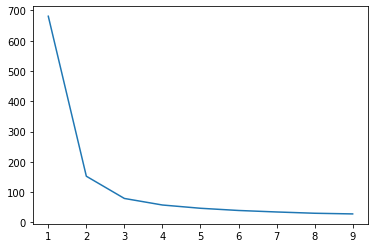

In [6]:
elb_list=[]
for i in range(1,10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  elb_list.append(kmeans.inertia_)

plt.plot(range(1,10),elb_list)

Creating Kmeans clustering object with n=3. Fit data to the cluster

In [7]:
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Predict labels from the model

In [8]:
y_pred = model.fit_predict(X)

Actual label from the dataset

In [9]:
y= df.iloc[:,5]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

Visulization of original and predicted clusters side by side

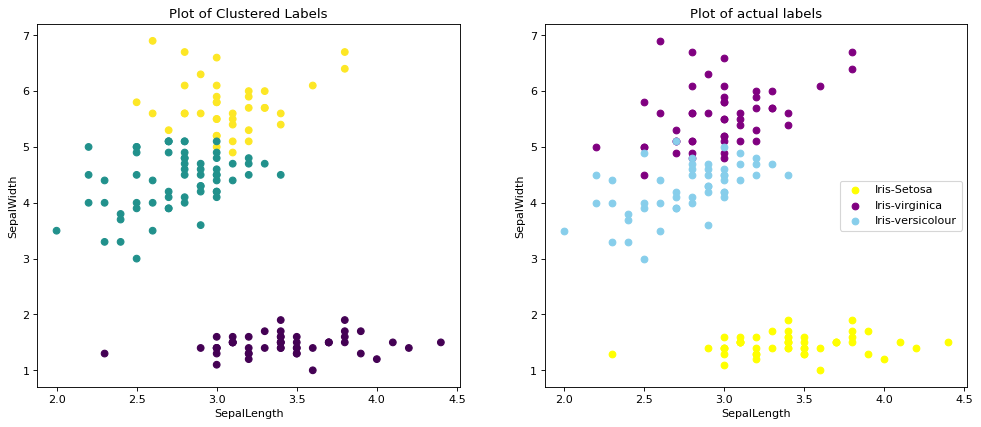

In [10]:
from matplotlib.pyplot import figure

figure(figsize=(15, 6), dpi=80)
plt.subplot(1,2,1)
plt.scatter(X[:,1],X[:,2],c=y_pred,label=y_pred)
plt.xlabel("SepalLength")
plt.ylabel("SepalWidth")
plt.title("Plot of Clustered Labels")
plt.subplot(1,2,2)
plt.scatter(X[y=='Iris-setosa',1],X[y=='Iris-setosa',2],c="yellow",label="Iris-Setosa")
plt.scatter(X[y=='Iris-virginica',1],X[y=='Iris-virginica',2],c="purple",label="Iris-virginica")
plt.scatter(X[y=='Iris-versicolor',1],X[y=='Iris-versicolor',2],c="skyblue",label="Iris-versicolour")

plt.title("Plot of actual labels")
plt.xlabel("SepalLength")
plt.ylabel("SepalWidth")
plt.legend()